<a href="https://colab.research.google.com/github/NamrathaKaranth/30-Days-of-Deep-Learning/blob/main/pcbimage_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os,cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()
!pip install pillow

Saving kaggle (1).json to kaggle (1).json


In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle (1).json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` chmod 600 ~/.kaggle/kaggle (1).json'


In [ ]:
!kaggle datasets download -d namrathakaranth/traindatapcbs

401 - Unauthorized


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread('/content/20200630_123352.jpg')

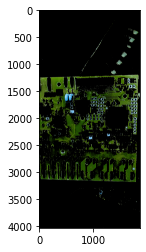

In [ ]:
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original = image.copy()
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
low_green = np.array([39, 42, 75])
high_green = np.array([102, 255, 255])
green_mask = cv2.inRange(hsv,low_green,high_green)
green = cv2.bitwise_and(original,original, mask=green_mask)
plt.imshow(green)

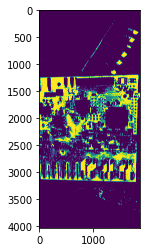

In [ ]:
thresh = cv2.threshold(green_mask, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]
plt.imshow(thresh)

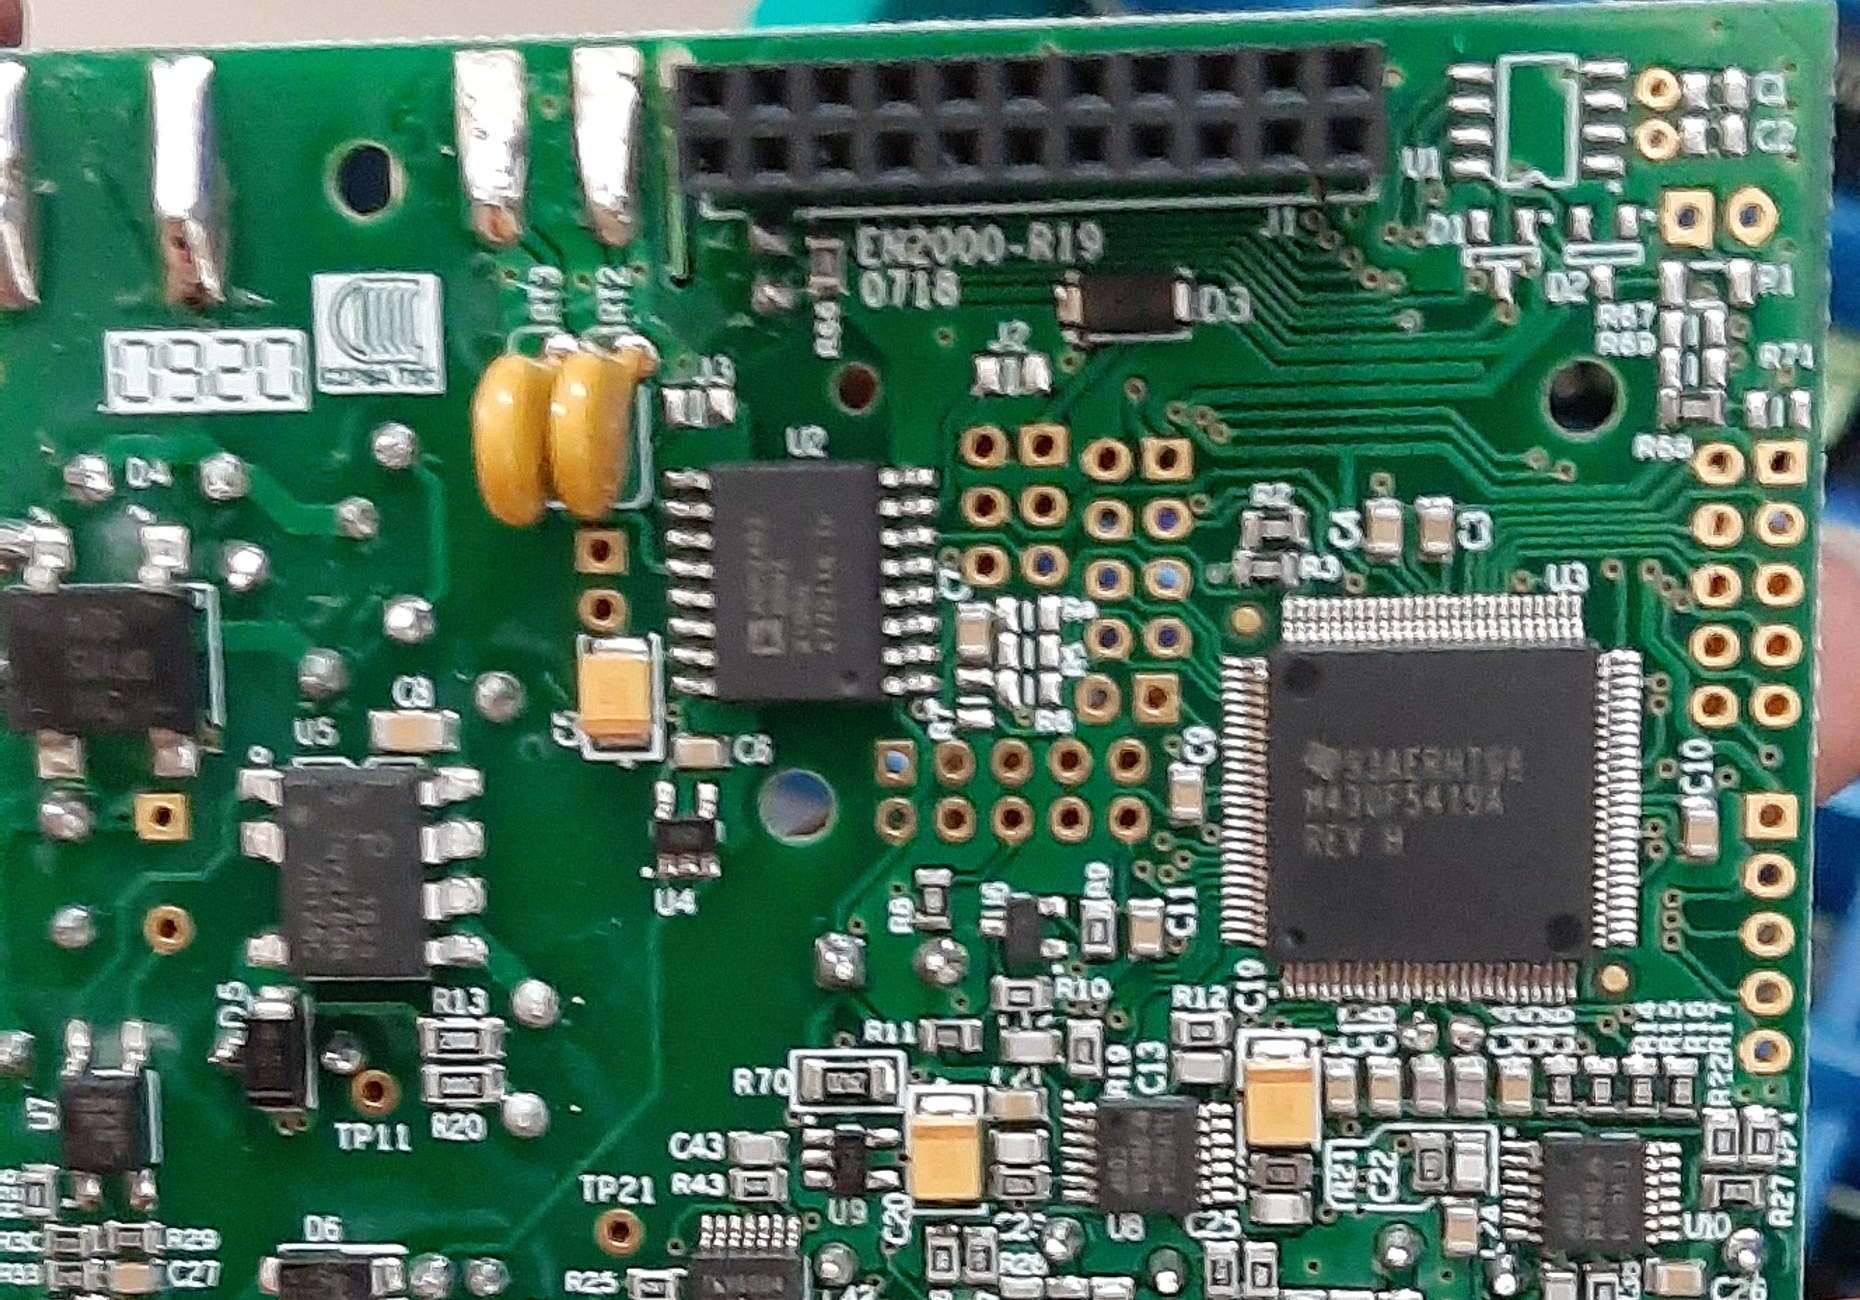

-1

In [ ]:
cnts = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

# Find bounding box and extract ROI
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = image[y:y+h, x:x+w]
    break

cv2_imshow(ROI)
cv2.imwrite('ROI.png',ROI)
cv2.waitKey()